# Unsupervised Machine Learning Performance Metrics

Classification accuracy is the number of correct predictions made as a ratio of all predictions made. This is the most common evaluation metric for classification problems, it is also the most misused. It is really only suitable when there are an equal number of observations in each class (which is rarely the case) and that all predictions and prediction errors are equally important, which is often not the case. Below is an example of calculating classification accuracy

 Classification of Metrics:

      1)Classification Accuracy
      2)Confusion Matrix.
      3)Classification Report.
      4)Area Under the Curve (AUC) and ROC Curve.

## Classification Accuracy

In [1]:
# evaluate a logistic regression model using ( k-fold    &    cross-validation )  instead using train_test_spilt

from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

In [2]:
# create dataset
X, y = make_classification(n_samples=100, n_features=20, n_informative=15, n_redundant=5,random_state=1)

here n_feature should be > (n_information + n_redundant)

In [3]:
len(X)

100

In [4]:
y

array([1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1])

In [5]:
len(y)

100

In [6]:
X.shape

(100, 20)

In [7]:
y.shape

(100,)

In [8]:
# prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=1, shuffle=True)

# create model
model = LogisticRegression()

In [9]:
# evaluate model
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

In [10]:
# report performance
print('Accuracy: {}%'.format(mean(scores)*100))

Accuracy: 85.0%


# Confusion Martix

A confusion matrix is a matrix of four(4) blocks which reflects the performance of our machine learning model.

The four(4) terms used in confusion matrix are:

    1)True Positive(TP)
    2)False Positive(FP)
    3)True Negative(TN)
    4)False Negative(FN)

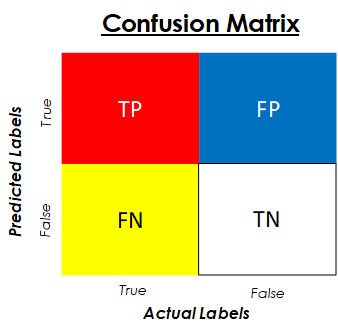

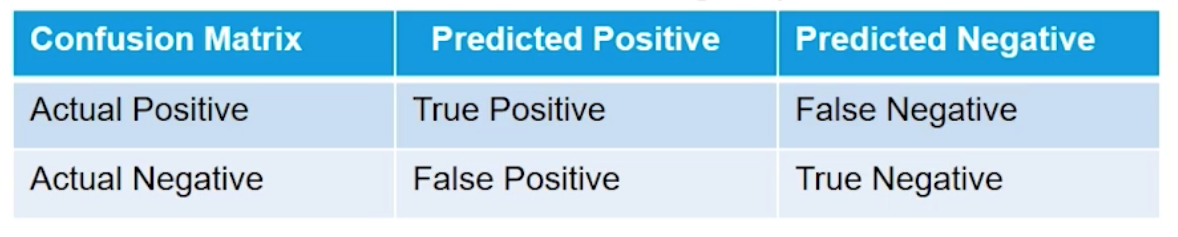

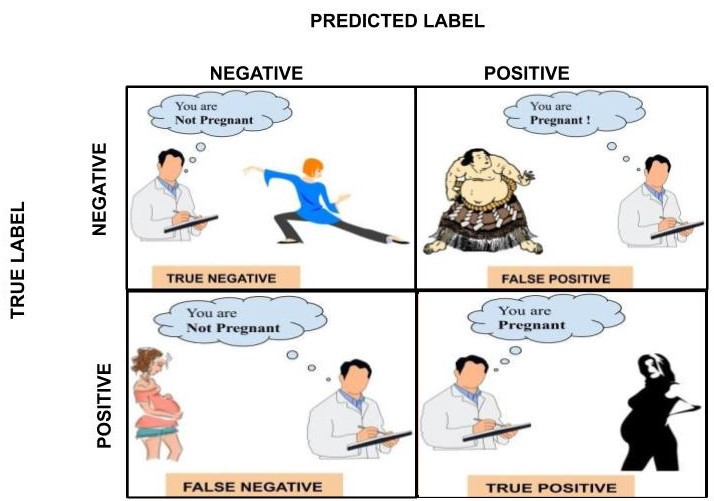

# best example for CONFFSION MATRIX

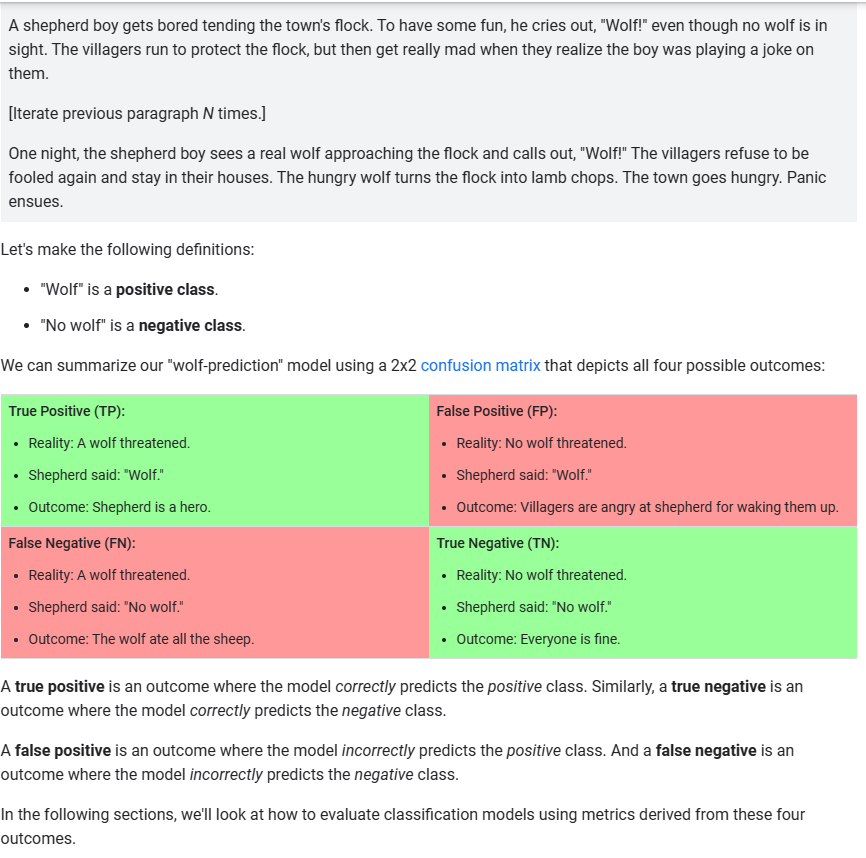

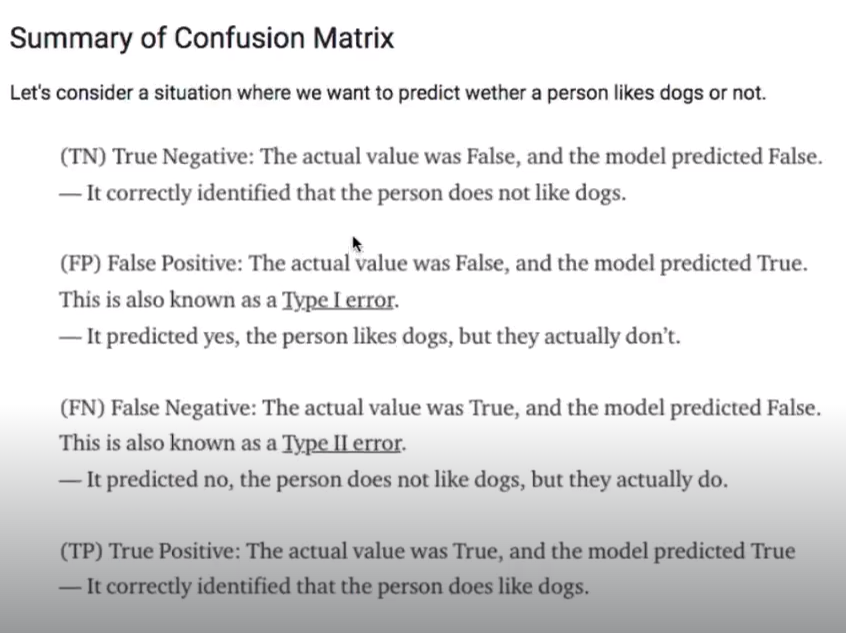

# Accuracy 

Accuracy = Score

In [11]:
#    for example purpose :

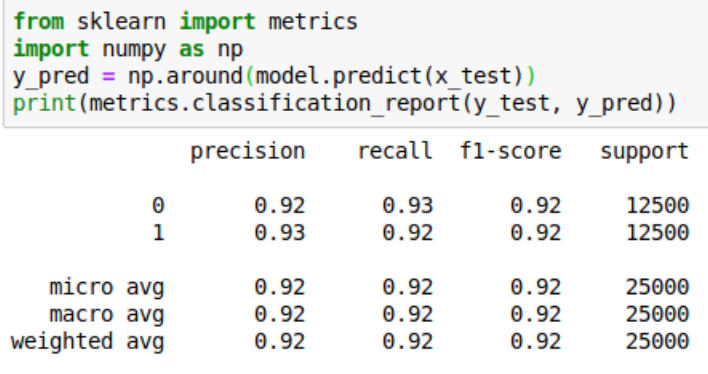

In [12]:
# from the image we will explore about    precision , recall , f1-score    sepearatly 

https://developers.google.com/machine-learning/crash-course/classification/accuracy  (for : Accuracy )

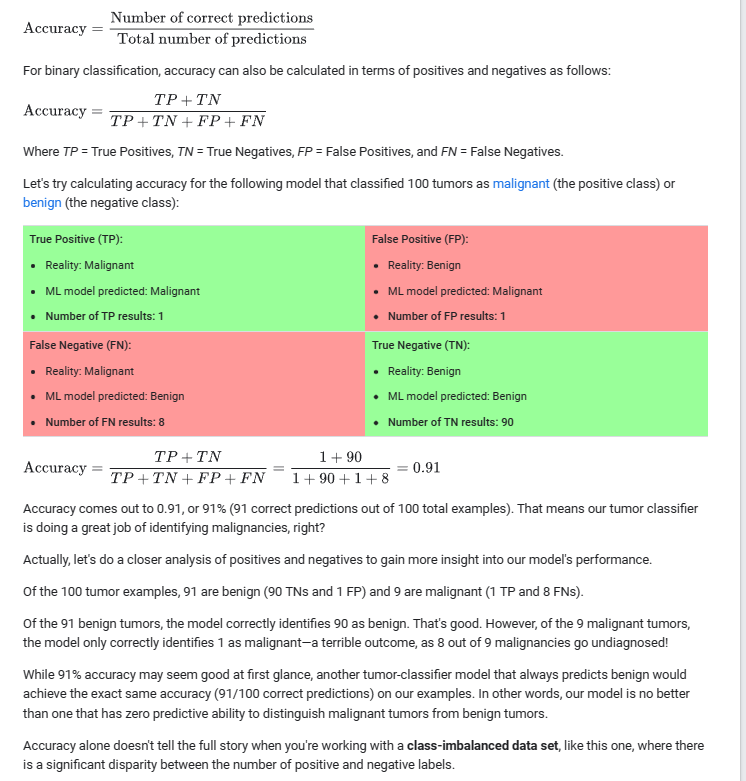

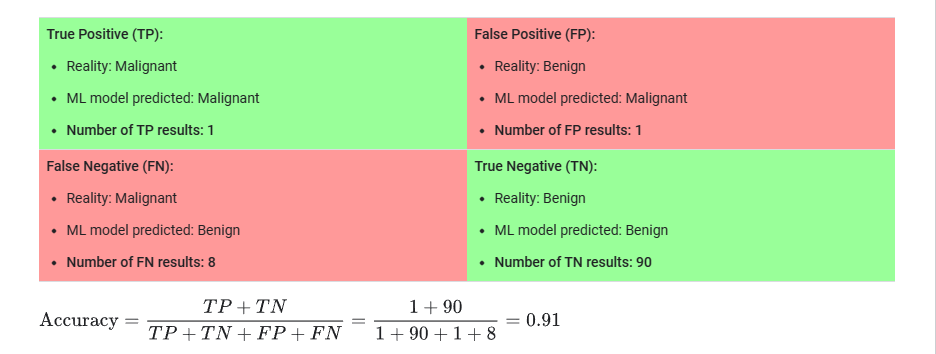

# Precision

 precision tells us about What proportion of positive identifications was actually correct?

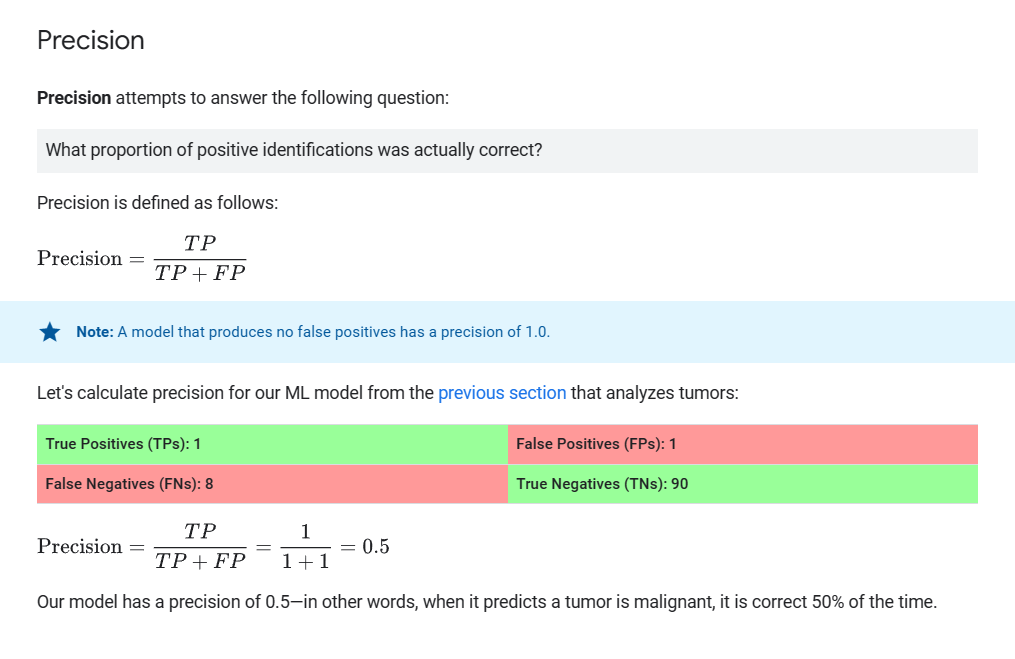

# Recall 

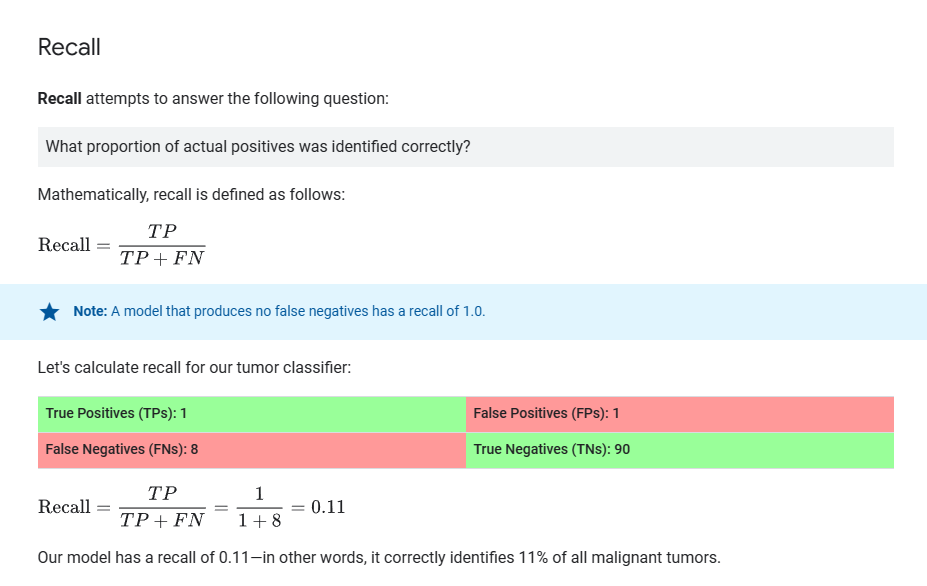

## The Tug of War between Precision and Recall

https://developers.google.com/machine-learning/crash-course/classification/precision-and-recall

Here in Precision and Recall if one value increases high by changing threshold value (i.e.. changing test,train data) then other value dicreses vice versa

### Micro & Macro averages

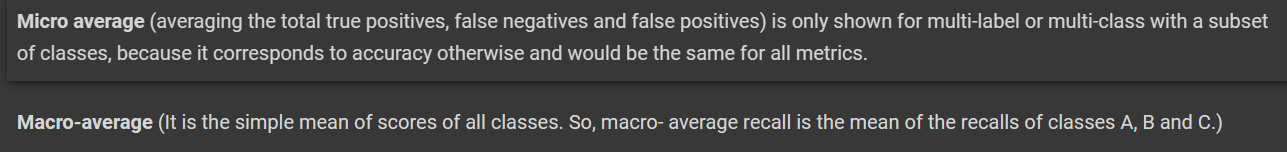

# Hands on AUC & ROC

    ROC = receiver operating characteristic
    AUC = area under curve

here we will build both logistic regression & support vector machine models & plot them to actually see what is AUC & ROC

In [13]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression    # importing logistic regression model

from sklearn import svm    # importing support vector machine model

from sklearn.utils import shuffle
from sklearn.metrics import roc_curve, auc

import pylab as pl

import warnings
warnings.filterwarnings('ignore')

random_state  = np.random.RandomState(1)

<IPython.core.display.Javascript object>

In [14]:
df = pd.read_csv('pima-indians-diabetes.csv')

X = df.drop('class', axis=1)
y = df['class']

<IPython.core.display.Javascript object>

In [15]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.5,random_state=1)    # splitting our data

classifier1 = LogisticRegression()      # building logistic regression model
classifier2 = svm.SVC(kernel='linear',probability=True)  # building support vrctor classifier model

probas1 = classifier1.fit(X_train, y_train).predict_proba(X_test)  # trying to get probability of predicted values 
probas2 = classifier2.fit(X_train, y_train).predict_proba(X_test)

True Positive == Recall

The false positive rate is calculated as the ratio between the number of negative events wrongly categorized as positive (false positives) and
the total number Of actual negative events (regardless Of classification).

false positive ==FP/(FP+TN)

In [16]:
#Compute ROC curve and AUC for logistic regression model

fpr1, tpr1, thresholds1 = roc_curve(y_test,probas1[:,1])  # fpr = false positive  &  tpr = true positive
roc_auc1 = auc(fpr1,tpr1) 
print('Area under the ROC curve : %f' %roc_auc1)

Area under the ROC curve : 0.830329


In [17]:
#Compute ROC curve and AUC for support vector classifier

fpr2, tpr2, thresholds2 = roc_curve(y_test,probas2[:,1])
roc_auc2 = auc(fpr2,tpr2) 
print('Area under the ROC curve : %f' %roc_auc2)

Area under the ROC curve : 0.836058


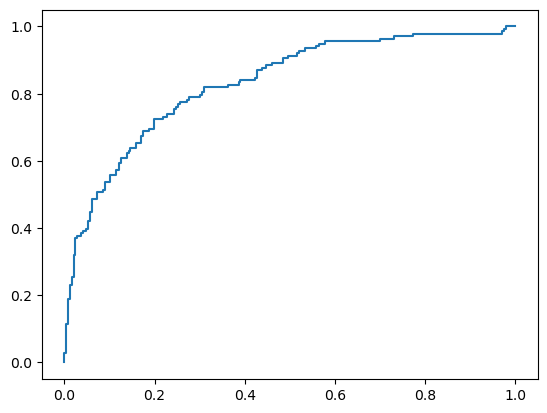

In [18]:
# let us plot these svm & logistic models

pl.clf()

pl.plot(fpr1, tpr1, label= 'ROC curve for logistic (area =%0.2f)' % roc_auc1)

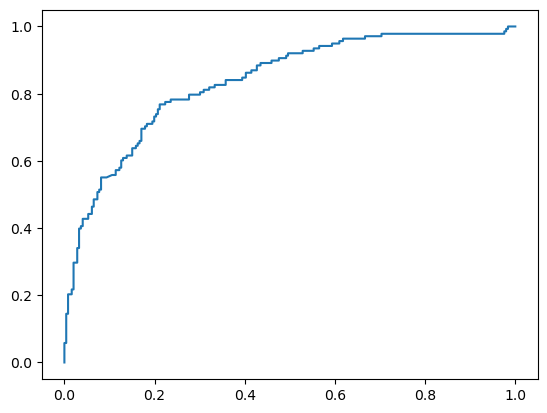

In [19]:
pl.plot(fpr2, tpr2, label= 'ROC curve for logistic (area =%0.2f)' % roc_auc2)

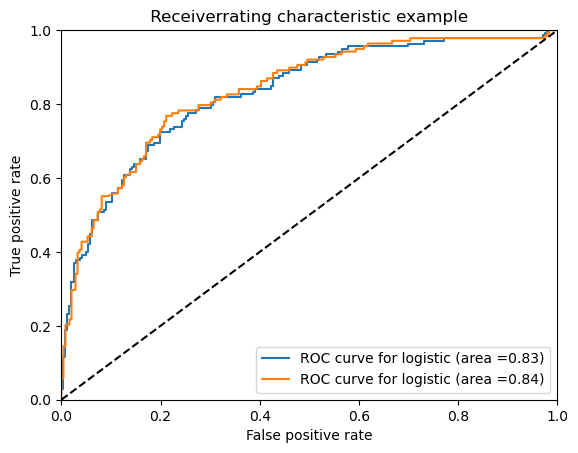

In [52]:
#now let us bring both logistic & svm model plots together 

pl.clf()

pl.plot(fpr1, tpr1, label= 'ROC curve for logistic (area =%0.2f)' % roc_auc1)
pl.plot(fpr2, tpr2, label= 'ROC curve for logistic (area =%0.2f)' % roc_auc2)

pl.plot([0,1] , [0,1], 'k--')
pl.xlim([0.0 , 1.0])
pl.ylim([0.0 , 1.0])

pl.xlabel('False positive rate')
pl.ylabel('True positive rate')
pl.title(' Receiverrating characteristic example ')

pl.legend(loc = 'lower right')

pl.show()

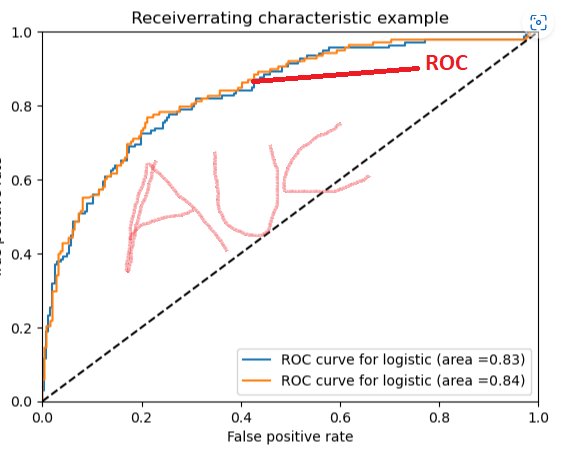